Loading: 1688640705_hr_comma_sep.xlsx
Shape: (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Missing values per column:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Numeric summary:
                          count        mean        std    min     25%     50%  \
satisfaction_level     14999.0    0.612834   0.248631   0.09    0.44    0.64   
last_evaluation        14999.0    0.716102   0.171169   0.36    0.56    0.72   
number_project         14999.0    3.803054   1.232592   2.00    3.00    4.00   
average_montly_hours   14999.0  201.050337  49.943099  96.00  156.00  200.00   
time_spend_company     14999.0    3.498233   1.460136   2.00    3.00    3.00   
Work_accident          14999.0    0.144610   0.351719   0.00    0.00    0.00   
left                   14999.0    0.238083   0.425924   0.00    0.00    0.00   
promotion_last_5years  14999.0

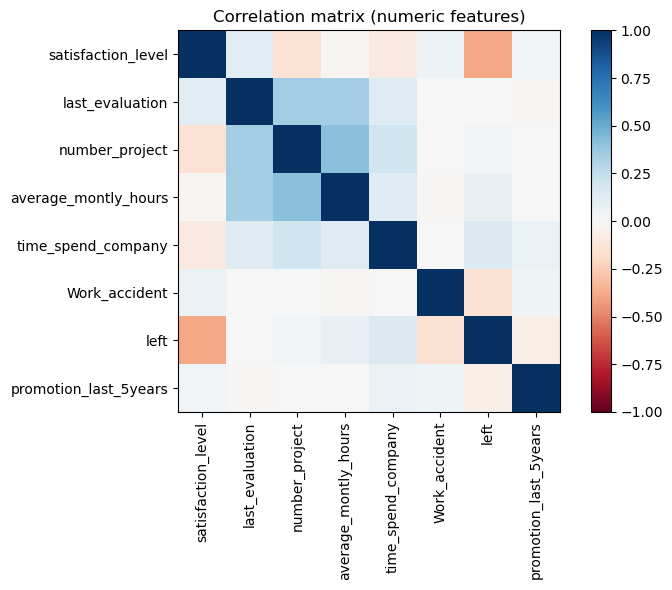

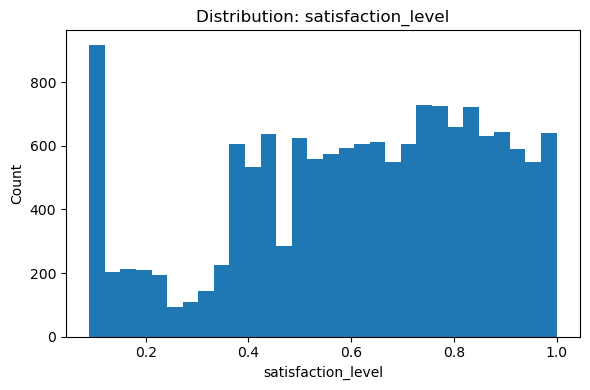

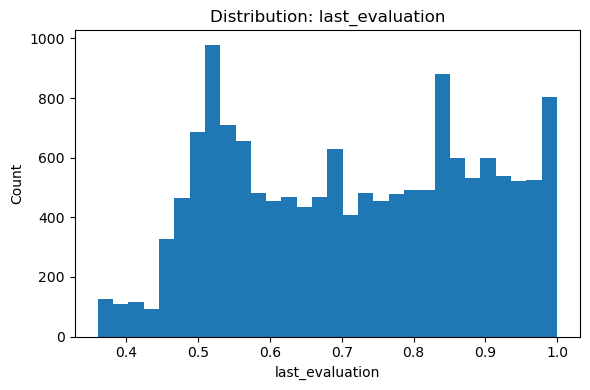

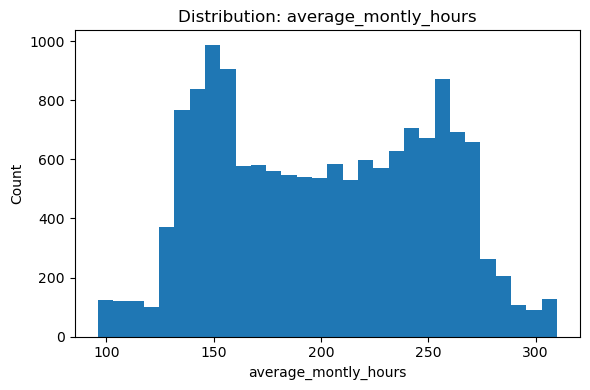

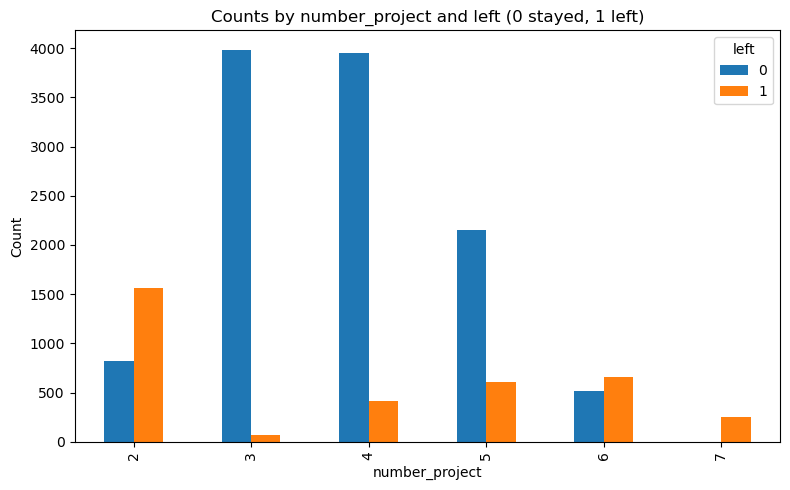

Proportion left by number_project:
 number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64


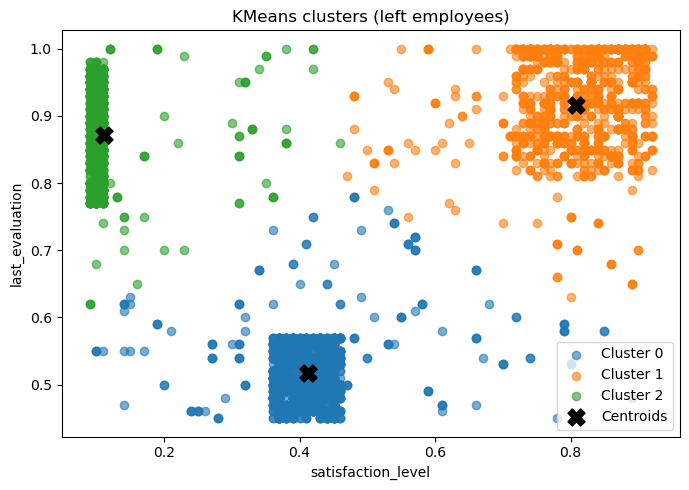

Cluster 0: n=1667, satisfaction_mean=0.412, evaluation_mean=0.517
Cluster 1: n=965, satisfaction_mean=0.808, evaluation_mean=0.916
Cluster 2: n=939, satisfaction_mean=0.111, evaluation_mean=0.871
Categorical columns: ['sales', 'salary']
After get_dummies shape: (14999, 19)
Train shape: (11999, 18) Test shape: (3000, 18)
y_train distribution: Counter({0: 9142, 1: 2857})
After SMOTE: Counter({0: 9142, 1: 9142})

--- LogisticRegression ---
CV (train after SMOTE) classification report:
              precision    recall  f1-score   support

           0     0.8094    0.7714    0.7899      9142
           1     0.7816    0.8183    0.7996      9142

    accuracy                         0.7948     18284
   macro avg     0.7955    0.7948    0.7947     18284
weighted avg     0.7955    0.7948    0.7947     18284

Test classification report:
              precision    recall  f1-score   support

           0     0.9060    0.7760    0.8360      2286
           1     0.5086    0.7423    0.6036      

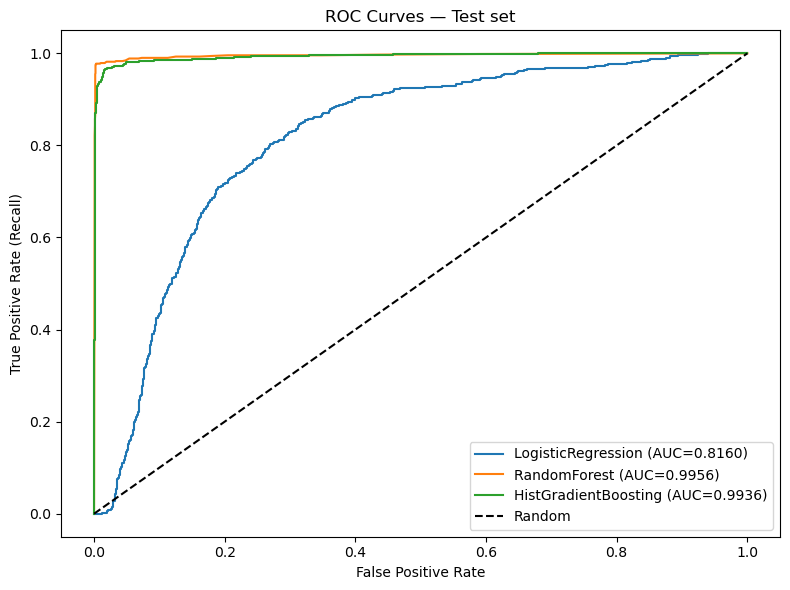


LogisticRegression confusion matrix (test):
[[1774  512]
 [ 184  530]]
Precision: 0.5086, Recall: 0.7423

RandomForest confusion matrix (test):
[[2267   19]
 [  16  698]]
Precision: 0.9735, Recall: 0.9776

HistGradientBoosting confusion matrix (test):
[[2254   32]
 [  36  678]]
Precision: 0.9549, Recall: 0.9496

Metric guidance: For predicting employees who will leave, recall on the 'left' class is often prioritized (you want to catch leavers).
But if interventions are expensive and false positives are costly, precision matters too. Choose threshold according to business cost tradeoffs.

Best model by AUC on test set: RandomForest (AUC=0.9956)
Counts per zone:
 risk_zone
Safe (Green)            2187
High Risk (Red)          661
Low Risk (Yellow)        105
Medium Risk (Orange)      47
Name: count, dtype: int64


,true_left,pred_prob_left,risk_zone
0,0,0.00,Safe (Green)
1,0,0.63,Medium Risk (Orange)
2,0,0.04,Safe (Green)
3,0,0.00,Safe (Green)
4,0,0.00,Safe (Green)
5,0,0.01,Safe (Green)
6,0,0.00,Safe (Green)
7,0,0.00,Safe (Green)
8,0,0.00,Safe (Green)
9,0,0.00,Safe (Green)


Saved test predictions to: employee_turnover_test_predictions.csv

Retention suggestions (per zone):
Safe (Green): Monitor periodically; maintain engagement and recognition programs.
Low Risk (Yellow): Light-touch interventions: pulse surveys, manager check-ins, career-path conversations.
Medium Risk (Orange): Targeted interventions: tailored learning opportunities, compensation review, management coaching.
High Risk (Red): High-priority retention: immediate manager outreach, personalized retention plans, consider counteroffers where justified.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import os

# ---------- 1) Load dataset ----------
# Adjust path if needed; this uses the uploaded file name pattern from the environment.
file_candidates = [
    "1688640705_hr_comma_sep.xlsx"
]
for p in file_candidates:
    if os.path.exists(p):
        file_path = p
        break
else:
    raise FileNotFoundError("1688640705_hr_comma_sep.xlsx")

print("Loading:", file_path)
df = pd.read_excel(file_path, engine='openpyxl')
print("Shape:", df.shape)
display(df.head())

# ---------- 2) Data quality checks ----------
print("Missing values per column:\n", df.isna().sum())
print("\nNumeric summary:\n", df.describe().T)
print("\nTarget distribution (left):\n", df['left'].value_counts())

# ---------- 3) EDA ----------
# 3.1 Correlation heatmap (matplotlib)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.show()

# 3.2 Distributions
for col in ['satisfaction_level','last_evaluation','average_montly_hours']:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 3.3 Bar plot: number_project vs left
proj_counts = df.groupby(['number_project','left']).size().unstack(fill_value=0)
proj_counts.plot(kind='bar', figsize=(8,5))
plt.title("Counts by number_project and left (0 stayed, 1 left)")
plt.xlabel("number_project"); plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print proportions for interpretation
print("Proportion left by number_project:\n", df.groupby('number_project')['left'].mean().sort_index())

# ---------- 4) Clustering (employees who left) ----------
left_df = df[df['left']==1].copy()
X_cluster = left_df[['satisfaction_level','last_evaluation']].dropna()
scaler_c = StandardScaler()
X_s = scaler_c.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_s)
left_df = left_df.loc[X_cluster.index]
left_df['cluster'] = clusters

# Plot clusters
centroids = scaler_c.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(7,5))
for cl in sorted(left_df['cluster'].unique()):
    sel = left_df['cluster']==cl
    plt.scatter(left_df.loc[sel,'satisfaction_level'], left_df.loc[sel,'last_evaluation'], label=f'Cluster {cl}', alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=150, color='black', label='Centroids')
plt.xlabel('satisfaction_level'); plt.ylabel('last_evaluation'); plt.title('KMeans clusters (left employees)')
plt.legend(); plt.tight_layout(); plt.show()

for cl in sorted(left_df['cluster'].unique()):
    sub = left_df[left_df['cluster']==cl]
    print(f"Cluster {cl}: n={len(sub)}, satisfaction_mean={sub['satisfaction_level'].mean():.3f}, evaluation_mean={sub['last_evaluation'].mean():.3f}")

# ---------- 5) Preprocessing ----------
# Convert categorical variables to dummies
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical columns:", cat_cols)
df_dummies = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("After get_dummies shape:", df_dummies.shape)

# Prepare X,y
X = df_dummies.drop(columns=['left'])
y = df_dummies['left']

# Stratified split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("y_train distribution:", Counter(y_train))

# Apply SMOTE on training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_sm))

# Standardize features (recommended for LR & gradient methods)
scaler_full = StandardScaler()
X_train_sm_s = scaler_full.fit_transform(X_train_sm)
X_test_s = scaler_full.transform(X_test)

# ---------- 6) Model training & 5-fold CV evaluation ----------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, n_jobs=-1),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'HistGradientBoosting': HistGradientBoostingClassifier(max_iter=100, random_state=42)
}

results = {}
for name, model in models.items():
    print("\n---", name, "---")
    # cross-validated predicted labels on SMOTE train (to see expected training behavior)
    y_cv_pred = cross_val_predict(model, X_train_sm_s, y_train_sm, cv=skf, method='predict', n_jobs=-1)
    print("CV (train after SMOTE) classification report:")
    print(classification_report(y_train_sm, y_cv_pred, digits=4))
    # Fit on full SMOTE train then evaluate on held-out test set
    model.fit(X_train_sm_s, y_train_sm)
    y_test_pred = model.predict(X_test_s)
    try:
        y_test_prob = model.predict_proba(X_test_s)[:,1]
    except Exception:
        # fallback if predict_proba not available
        y_test_prob = y_test_pred.astype(float)
    print("Test classification report:")
    print(classification_report(y_test, y_test_pred, digits=4))
    cm = confusion_matrix(y_test, y_test_pred)
    roc = roc_auc_score(y_test, y_test_prob)
    print("Confusion matrix:\n", cm)
    print("ROC AUC (test):", round(roc,4))
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    results[name] = {'model':model, 'roc':(fpr,tpr,roc), 'y_test_prob':y_test_prob, 'y_test_pred':y_test_pred}

# ---------- 7) ROC curves ----------
plt.figure(figsize=(8,6))
for name,res in results.items():
    fpr,tpr,roc = res['roc']
    plt.plot(fpr,tpr,label=f"{name} (AUC={roc:.4f})")
plt.plot([0,1],[0,1],'k--', label='Random')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves — Test set")
plt.legend(); plt.tight_layout(); plt.show()

# ---------- 8) Confusion matrices and metric choice ----------
for name, res in results.items():
    print(f"\n{name} confusion matrix (test):")
    print(confusion_matrix(y_test, res['y_test_pred']))
    prec = precision_score(y_test, res['y_test_pred'])
    rec = recall_score(y_test, res['y_test_pred'])
    print(f"Precision: {prec:.4f}, Recall: {rec:.4f}")

print("\nMetric guidance: For predicting employees who will leave, recall on the 'left' class is often prioritized (you want to catch leavers).")
print("But if interventions are expensive and false positives are costly, precision matters too. Choose threshold according to business cost tradeoffs.")

# ---------- 9) Select best model & predict test probabilities ----------
best_name = max(results.keys(), key=lambda k: results[k]['roc'][2])
best_auc = results[best_name]['roc'][2]
print(f"\nBest model by AUC on test set: {best_name} (AUC={best_auc:.4f})")
best_probs = results[best_name]['y_test_prob']
test_df = X_test.reset_index(drop=True).copy()
test_df['true_left'] = y_test.reset_index(drop=True)
test_df['pred_prob_left'] = best_probs

# Categorize into zones
def zone_label(p):
    if p < 0.20: return 'Safe (Green)'
    elif p < 0.60: return 'Low Risk (Yellow)'
    elif p < 0.90: return 'Medium Risk (Orange)'
    else: return 'High Risk (Red)'
test_df['risk_zone'] = test_df['pred_prob_left'].apply(zone_label)
print("Counts per zone:\n", test_df['risk_zone'].value_counts())

# Show sample of predictions
display(test_df[['true_left','pred_prob_left','risk_zone']].head(30))

# Save predictions
out_path = "employee_turnover_test_predictions.csv"
test_df.to_csv(out_path, index=False)
print("Saved test predictions to:", out_path)

# ---------- 10) Retention strategies by zone (suggestions) ----------
suggestions = {
    'Safe (Green)': "Monitor periodically; maintain engagement and recognition programs.",
    'Low Risk (Yellow)': "Light-touch interventions: pulse surveys, manager check-ins, career-path conversations.",
    'Medium Risk (Orange)': "Targeted interventions: tailored learning opportunities, compensation review, management coaching.",
    'High Risk (Red)': "High-priority retention: immediate manager outreach, personalized retention plans, consider counteroffers where justified."
}
print("\nRetention suggestions (per zone):")
for z,v in suggestions.items():
    print(f"{z}: {v}")
